**Problem Statement** 

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
#Importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### Importing the dataset

In [2]:
leads = pd.read_csv('Leads.csv')

## Understanding the datset

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
#Checking the information of the dataset.
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning

### We can see that there are null values which needs to be treated accordingly.

In [6]:
#checking the null values in the dataframe.
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
#repalcing the select values with null values of the entire lead dataframe as we can see it occuring multiple times.
leads = leads.replace('Select',np.nan)

In [8]:
#Now checking the percentage of null values w.r.t. the total column entries
nulls_percent = round(leads.isnull().sum()/len(leads)*100,2).sort_values(ascending=False)
nulls_percent

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [9]:
#Droping the columns having more than 40% of the null values
to_drop = nulls_percent[nulls_percent>40]
to_drop

How did you hear about X Education    78.46
Lead Profile                          74.19
Lead Quality                          51.59
Asymmetrique Profile Score            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
dtype: float64

In [10]:
leads.drop(labels = list(to_drop.index),axis=1,inplace=True)

In [11]:
round(leads.isnull().sum()/len(leads)*100,2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [12]:
#more than 40%null values columns are droped now we will treat null values for remaining columns as well

In [13]:
#treating What matters most to you in choosing a course column
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [14]:
#we can drop What matters most to you in choosing a course column as most of the values are better career prospects or null
leads.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [15]:
#Treating What is your current occupation column
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [16]:
#replacing null values with Not specified and grouping low values column to others
leads['What is your current occupation'].replace(np.nan,'not specified',inplace=True)
leads['What is your current occupation'].replace(['Businessman','Housewife'],'Other',inplace=True)

In [17]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
not specified           2690
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

In [18]:
#Treating Country column
leads.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [19]:
#droping country as most values are either India or Null values which will not help much in our analysis
leads.drop('Country',axis=1,inplace=True)

In [20]:
#treating Specialization
leads.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
#replacing NaN values with not spcifie since it may happen that students specialization may not be in the list
leads.Specialization.replace(np.nan,'not specified',inplace=True)

In [22]:
leads.Specialization.value_counts(dropna=False)

not specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [23]:
#WE can group management course into Management specialisation and business related to business specialisation
leads.Specialization.replace(['Finance Management','Human Resource Management','Marketing Management',
                              'Operations Management','IT Projects Management','Supply Chain Management',
                             'Healthcare Management','Hospitality Management','Retail Management'],
                             'Management Specialization',inplace=True)
leads.Specialization.replace(['E-Business','Rural and Agribusiness','International Business'],
                             'Business Specialization',inplace=True)

In [24]:
#Treating tags columns
leads.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [25]:
#replacing nan values with others
leads.Tags.replace(np.nan,'not specified',inplace=True)
#Replacing low frequencies tags to one tag i.e. other tags
leads.Tags.replace(['Recognition issue (DEC approval)','University not recognized','Shall take in the next coming month',
                   'Lateral student','Interested in Next batch','In confusion whether part time or DLP',
                   'Want to take admission but has financial problems','Still Thinking','Lost to Others',
                   'in touch with EINS','number not provided','opp hangup','wrong number given','Diploma holder (Not Eligible)',
                   'invalid number','Graduation in progress','Interested  in full time MBA','Not doing further education',
                   'Switched off'],'Other Tags',inplace=True)

In [26]:
#again checking the amount of null values still present
round(leads.isnull().sum()/len(leads)*100,2).sort_values(ascending=False)

City                                        39.71
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Prospect ID                                  0.00
X Education Forums                           0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Tags                                         0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
Magazine                                     0.00
Newspaper Article                            0.00
Lead Number                                  0.00
Search                                       0.00


In [27]:
leads.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Maximum numbers are that of mumbai and places in it or Unknown.So this column is not helpful for us we can drop it.


In [28]:
leads.drop('City',axis=1,inplace=True)

In [29]:
#checking lead source clumn once
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [30]:
#replacing google with Google and facebook with social media and low frequencies to others
leads['Lead Source']=leads['Lead Source'].replace(np.nan,'others')
leads['Lead Source']=leads['Lead Source'].replace('google','Google')
leads['Lead Source']=leads['Lead Source'].replace('Social Media','Facebook')
leads['Lead Source']=leads['Lead Source'].replace(['NC_EDM','blog','WeLearn','welearnblog_Home','Pay per Click Ads',
                                                  'testone','youtubechannel','Press_Release',
                                                  'Click2call','bing'],'others')

In [31]:
# Treating last Activity columns
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [32]:
#replacing nan values to others and grouping the low frequencies data to others aswell.
leads['Last Activity']=leads['Last Activity'].replace(np.nan,'others')
leads['Last Activity']=leads['Last Activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow',
                                                      'Email Marked Spam','Email Received','View in browser link Clicked',
                                                      'Approached upfront','Had a Phone Conversation','Unsubscribed',
                                                      'Unreachable'],'others')

In [33]:
# Grouping values with low count in order to remove bias
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced', 'Email Link Clicked',
                                                                         'Unreachable', 'Had a Phone Conversation',
                                                                        'Olark Chat Conversation', 'Approached upfront',
                                                                        'Resubscribed to emails', 'Unsubscribed',
                                                                         'View in browser link Clicked',
                                                                        'Form Submitted on Website', 'Email Received',
                                                                         'Email Marked Spam'], 'others')

In [34]:
leads.isnull().sum()/len(leads)

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.000000
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.014827
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.014827
Last Activity                               0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.

In [35]:
#imputing the values with meadian of the column
leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan,leads['TotalVisits'].median())

In [36]:
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan,leads['Page Views Per Visit'].median())

In [37]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

In [38]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [39]:
leads['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [40]:
leads['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [41]:
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [42]:
leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [43]:
leads['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [44]:
leads['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### After analysing the the dataset we have several columns like Do not call, Digital advertisement which seems unnecessary for our analysis as it contains majority of 1 values only.

In [45]:
cols_to_drop = ['Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement',
               'Newspaper','Search','Newspaper Article','X Education Forums','Prospect ID',
               'I agree to pay the amount through cheque','Do Not Call',
               'Get updates on DM Content','Update me on Supply Chain Content','Magazine','Lead Number']

In [46]:
leads = leads.drop(cols_to_drop,axis=1)

#### Now checking the info of leads datset after treating all the null values accordingly.

In [47]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

## Univariate Analysis

In [48]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,not specified,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,not specified,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,others,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,not specified,Unemployed,Will revert after reading the email,No,Modified


In [49]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

## Univariate analysis

In [50]:
#defining a function to make plotting easy for us.
def uniplot(var1):
    plt.figure(figsize=(12,8))
    sns.countplot(x=var1,hue='Converted',data=leads,palette='rocket')
    plt.xticks(rotation=90)
    plt.show()

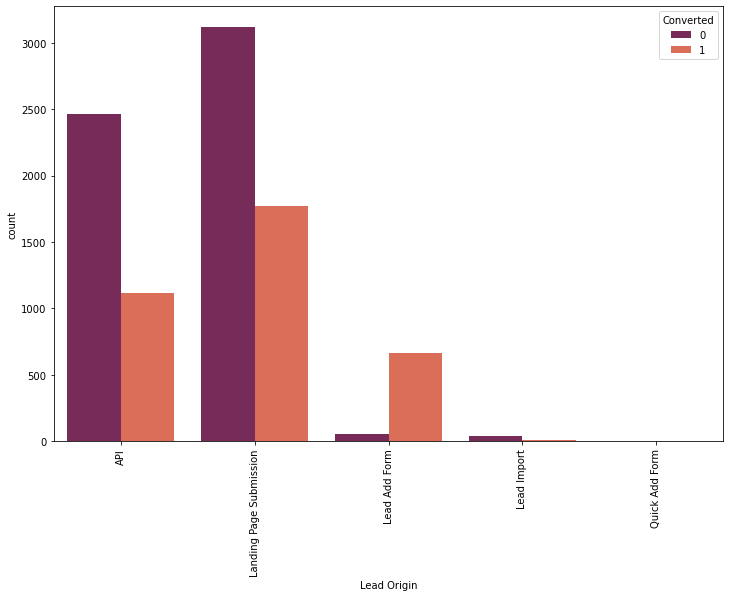

In [51]:
#visualizing lead Origin column w.r.t. converted column i.e. our target column
uniplot('Lead Origin')

<!-- ### Inferences -->


### Inferences of Lead Origin:-
#### 1. lead Ad form has the highest lead coversion percentage amongst all.
#### 2. Landing page submission has highest negative coversion rate. 

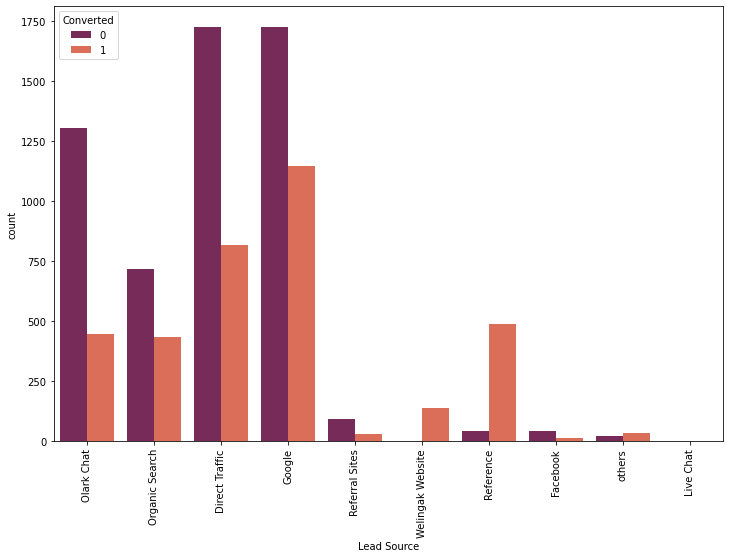

In [52]:
uniplot('Lead Source')

### Inferences of Lead Source
#### 1.google and Direct traffic has many negative leads.
#### 2.Highest postive leads conversion are from references. 

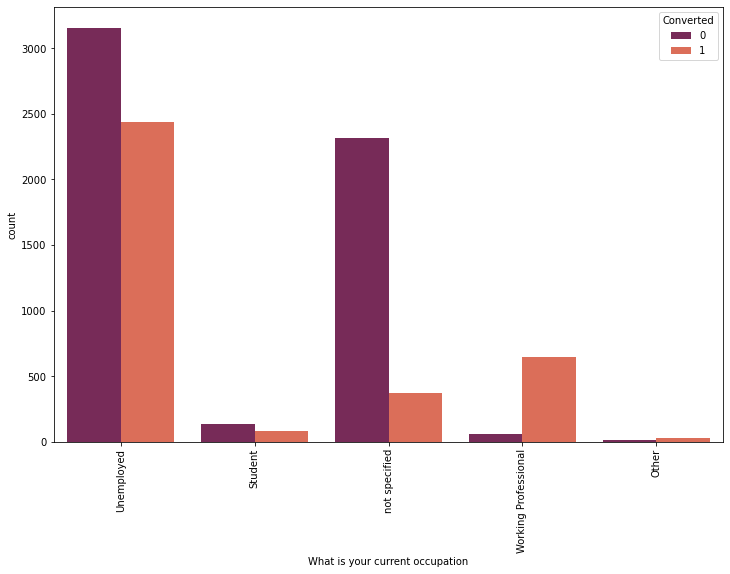

In [53]:
uniplot('What is your current occupation')

### Infernces for Occupation:-
#### 1.If a customer happens to be unemployed their chances of enrolling in any program is good.
#### 2.working profesional has the highest conversion rate. 
#### 3.Not specified happens to be negative leads collector as its conversion rate is very low.

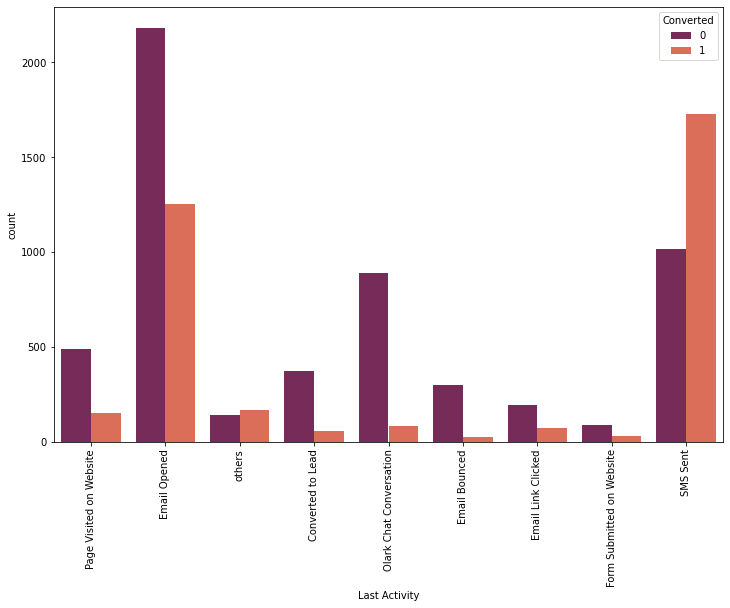

In [54]:
uniplot('Last Activity')

### Inferences of Last Activity:-
#### 1.If last activity of a customer is email opened, then it likely be negative lead as it holds highest numer for the same.
#### 2.If last activity happens to be SMS sent,then it is liely to be a positive lead as it has highest percentage of lead conversion.

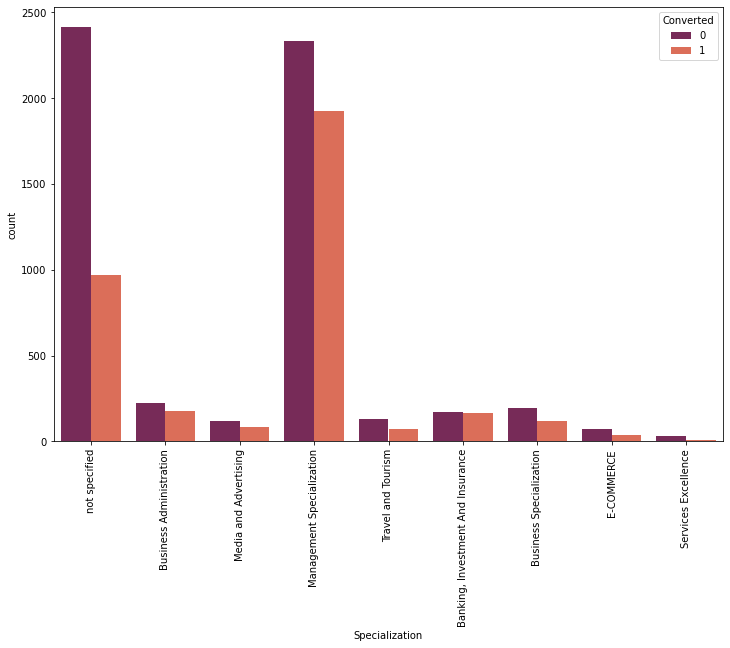

In [55]:
uniplot('Specialization')

#### Management specialization seems to attract most leads whose conversion rate is roughly more than 70%

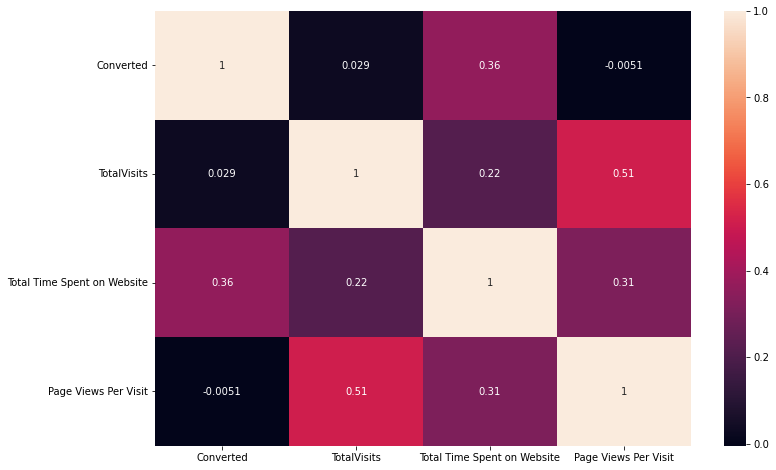

In [56]:
### Checking correlation of Numerical columns of the dataset with heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(leads.corr(),annot=True)
plt.show()

### Inferences of numerical column:
#### 1.the numerical columns show less correlation between them.

### Outliers treatment

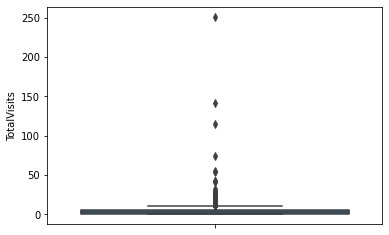

In [57]:
#TotalVisits column
sns.boxplot(y = 'TotalVisits',data=leads)
plt.show()

In [58]:
#since outliers are present so we need to treat the outliers aswell.
leads['TotalVisits'].describe(percentiles=[0.1,0.25,0.50,0.75,0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [59]:
leads = leads[(leads['TotalVisits'] <= leads['TotalVisits'].quantile(0.99))]

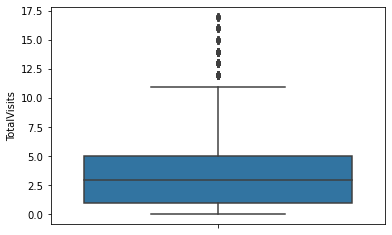

In [60]:
#visualising again
sns.boxplot(y=leads['TotalVisits'])
plt.show()

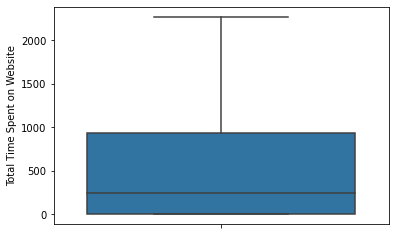

In [61]:
##Total time sent on websites column
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

#### There is no possible outliers that we need to treat for this column

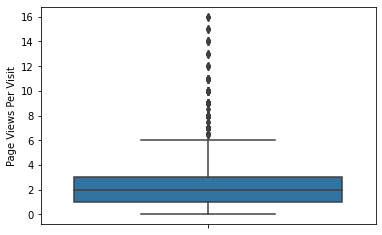

In [62]:
#treating Page Views Per Visit column
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [63]:
leads['Page Views Per Visit'].describe(percentiles=[0.1,0.25,0.50,0.75,0.99])

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

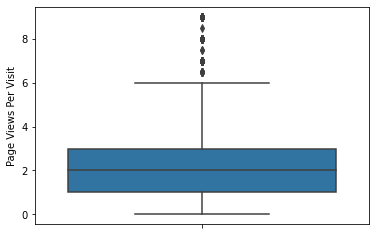

In [64]:
#there is outlier we need to treat by removing top 1% of values
leads = leads[(leads['Page Views Per Visit'] <= leads['Page Views Per Visit'].quantile(0.99))]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

### Visualizing Numerical columns w.r.t. target column

In [65]:
#defing a function for that 
def numplot(var1):
    plt.figure(figsize=(12,8))
    sns.boxplot(x='Converted',y=var1,data=leads,palette='rocket')
    plt.show()

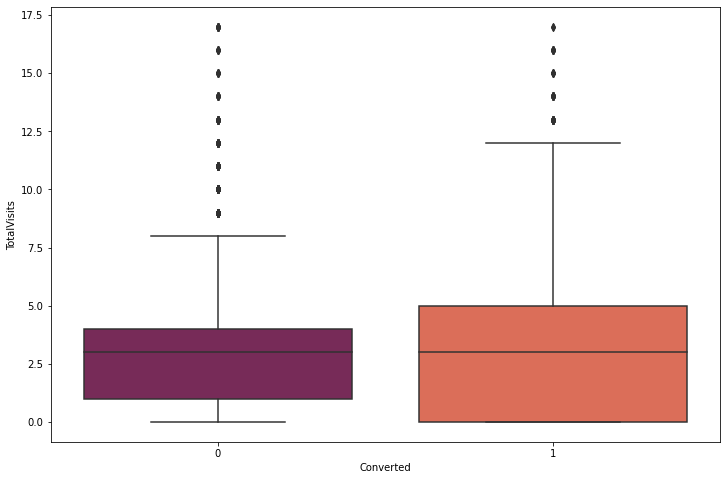

In [66]:
numplot('TotalVisits')

#### Median of both the cases seems to be too close for any infernces.

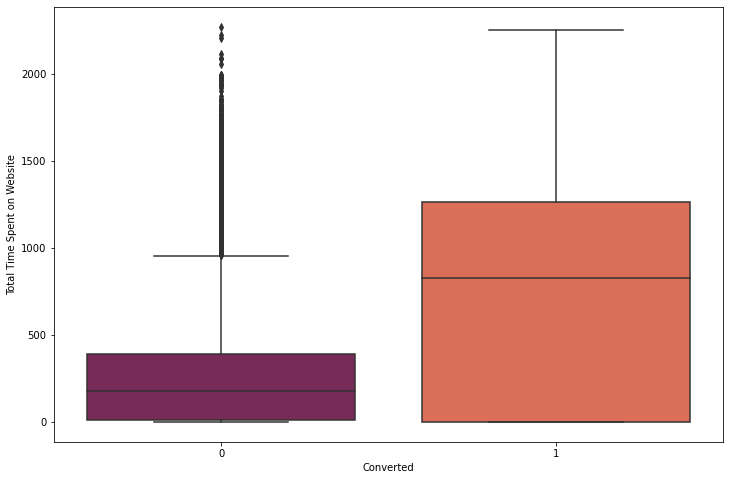

In [67]:
numplot('Total Time Spent on Website')

#### Person spending more time in webiste are more likely to be converted.

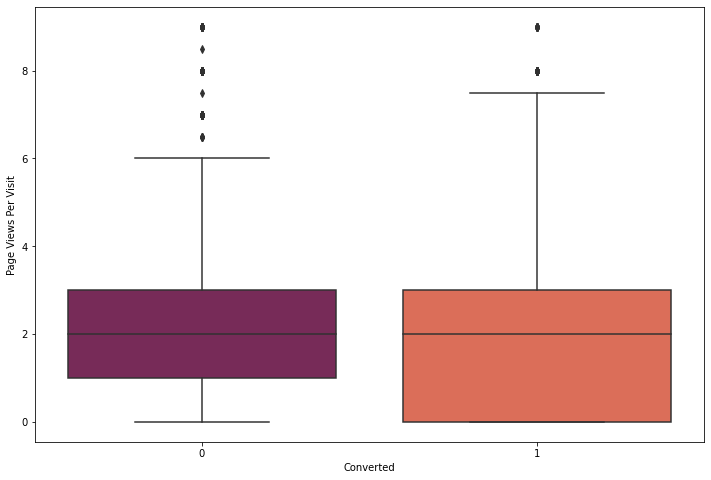

In [68]:
numplot('Page Views Per Visit')

#### Median of both the cases seems to be too close for any infernces.

## Bivariate Analysis

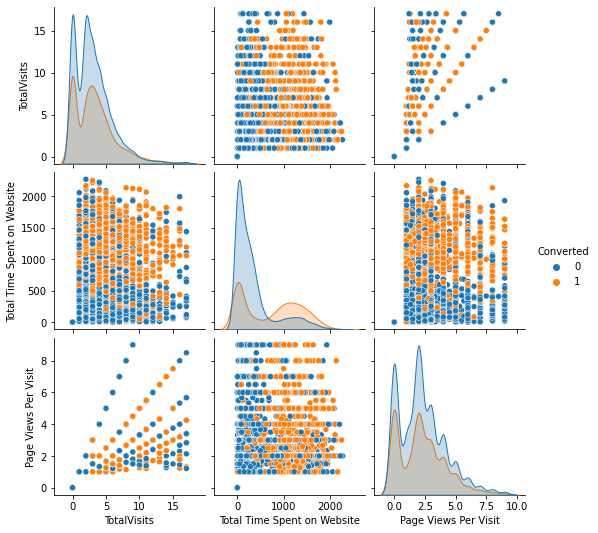

In [69]:
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

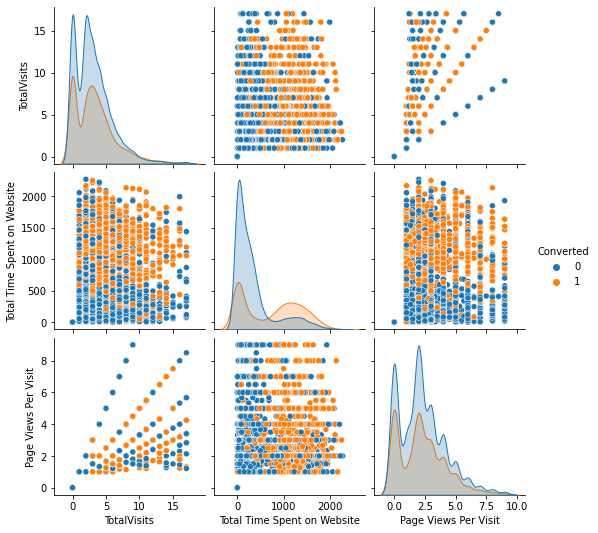

In [70]:
xedu = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(xedu,diag_kind='kde', hue = 'Converted')
plt.show()

In [71]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedxedu = pd.DataFrame(pt.fit_transform(xedu))
transformedxedu.columns = xedu.columns
transformedxedu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.446331,-1.464964,-1.447784,-0.790357
1,0.814979,0.737156,0.320625,-0.790357
2,-0.166878,1.306766,0.062974,1.265250
3,-0.675465,0.276546,-0.557142,-0.790357
4,-0.166878,1.253884,-0.557142,1.265250


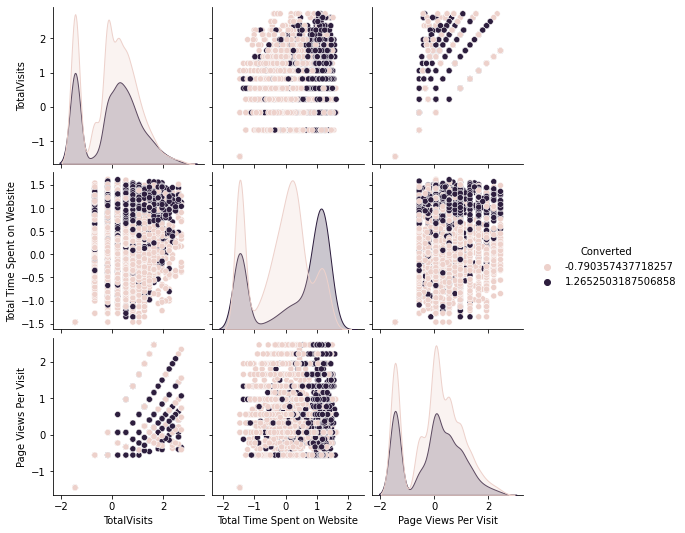

In [72]:
sns.pairplot(transformedxedu,diag_kind='kde',hue='Converted')
plt.show()

## Dummy creation

In [73]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9090 non-null   object 
 1   Lead Source                             9090 non-null   object 
 2   Do Not Email                            9090 non-null   object 
 3   Converted                               9090 non-null   int64  
 4   TotalVisits                             9090 non-null   float64
 5   Total Time Spent on Website             9090 non-null   int64  
 6   Page Views Per Visit                    9090 non-null   float64
 7   Last Activity                           9090 non-null   object 
 8   Specialization                          9090 non-null   object 
 9   What is your current occupation         9090 non-null   object 
 10  Tags                                    9090 non-null   obje

In [74]:
#Lead Origin
dummy_lo = pd.get_dummies(leads['Lead Origin'],prefix='Lead_Origin')
leads = pd.concat([leads,dummy_lo],axis=1)

In [75]:
#Lead Source
dummy_ls=pd.get_dummies(leads['Lead Source'],prefix='Lead_Source')
dummy_ls = dummy_ls.drop('Lead_Source_others',axis=1)
leads = pd.concat([leads,dummy_ls],axis=1)

In [76]:
#Last Activity
dummy_la = pd.get_dummies(leads['Last Activity'], prefix = 'Last_Activity')
dummy_la = dummy_la.drop('Last_Activity_others',axis=1)
leads = pd.concat([leads,dummy_la],axis=1)

In [77]:
#Specialization
dummy_s = pd.get_dummies(leads['Specialization'],prefix='Specialization')
dummy_s = dummy_s.drop('Specialization_not specified',axis=1)
leads = pd.concat([leads,dummy_s],axis=1)

In [78]:
#What is your current occupation
dummy_o = pd.get_dummies(leads['What is your current occupation'],prefix='Occupation')
dummy_o = dummy_o.drop('Occupation_Other',axis=1)
leads=pd.concat([leads,dummy_o],axis=1)


In [79]:
#Tags
dummy_t = pd.get_dummies(leads['Tags'],prefix='Tags')
dummy_t = dummy_t.drop('Tags_not specified',axis=1)
leads=pd.concat([leads,dummy_t],axis=1)

In [80]:
#Last Notable Activity
dummy_lna = pd.get_dummies(leads['Last Notable Activity'],prefix='Last_Notable_Activity')
dummy_lna = dummy_lna.drop('Last_Notable_Activity_others',axis=1)
leads=pd.concat([leads,dummy_lna],axis=1)

In [81]:
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                   3361
Email Opened               2789
SMS Sent                   2143
others                      509
Page Visited on Website     288
Name: Last Notable Activity, dtype: int64

In [82]:
#Converting yes/no to 1/0 for two columns
def binary_map(x):
    return x.map({'Yes': 1,'No': 0})
cols = ['A free copy of Mastering The Interview','Do Not Email']
leads[cols] = leads[cols].apply(binary_map)

In [83]:
columns_todrop = leads.select_dtypes(include = 'object').columns
columns_todrop

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Last Notable Activity'],
      dtype='object')

In [84]:
#removing duplicate columns
leads.drop(columns_todrop,axis=1,inplace=True)

In [85]:
#Viewing the hed to see if columns are in proper manner or not.
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,...,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0,0.0,0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [86]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9090 non-null   int64  
 1   Converted                                         9090 non-null   int64  
 2   TotalVisits                                       9090 non-null   float64
 3   Total Time Spent on Website                       9090 non-null   int64  
 4   Page Views Per Visit                              9090 non-null   float64
 5   A free copy of Mastering The Interview            9090 non-null   int64  
 6   Lead_Origin_API                                   9090 non-null   uint8  
 7   Lead_Origin_Landing Page Submission               9090 non-null   uint8  
 8   Lead_Origin_Lead Add Form                         9090 non-null   uint8  
 9   Lead_Origin_Lead Im

### Spliting the leads dataframe into train-test split

In [87]:
y = leads.pop('Converted')
X = leads

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.70,random_state=100)

In [89]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,...,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
302,0,7.0,250,2.33,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6087,1,0.0,0,0.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1033,0,5.0,470,5.00,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7656,1,6.0,352,6.00,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3241,0,4.0,973,1.33,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6363 entries, 302 to 5730
Data columns (total 52 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      6363 non-null   int64  
 1   TotalVisits                                       6363 non-null   float64
 2   Total Time Spent on Website                       6363 non-null   int64  
 3   Page Views Per Visit                              6363 non-null   float64
 4   A free copy of Mastering The Interview            6363 non-null   int64  
 5   Lead_Origin_API                                   6363 non-null   uint8  
 6   Lead_Origin_Landing Page Submission               6363 non-null   uint8  
 7   Lead_Origin_Lead Add Form                         6363 non-null   uint8  
 8   Lead_Origin_Lead Import                           6363 non-null   uint8  
 9   Lead_Origin_Quick

## Feature Scaling

In [91]:
scaler = StandardScaler()
numeric_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

In [92]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,...,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
302,0,1.336782,-0.428736,0.044021,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6087,1,-1.094877,-0.887355,-1.206716,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1033,0,0.642022,-0.025151,1.477269,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7656,1,0.989402,-0.241619,2.014065,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3241,0,0.294642,0.897591,-0.492776,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Model Building

### 1st Model

In [93]:
##Building a model using statsmodels
lgrm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lgrm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 24 Jan 2023   Deviance:                       77735.
Time:                        20:58:21   Pearson chi2:                 3.80e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             7.091e+14   2.11e+07   3.36e+07      0.000    7.09e+14    7.09e+14
Do Not Email                                     -3.714e+14   4.24e+06  -8.76e+07      0.000   -3.71e+14   -3.71e+14
TotalVisits                                       7.768e+13   1.31e+06   5.92e+07      0.000    7.77e+13    7.77e+13
Total Time Spent on Website                       3.621e+14   1.02e+06   3.56e+08      0.000    3.62e+14    3.62e+14
Page Views Per Visit                             -1.006e+14   1.43e+06  -7.05e+07      0.000   -1.01e+14   -1.01e+14
A free copy of Mastering The Interview            -6.26e+13   2.71e+06  -2.31e+07      0.000   -6.26e+13   -6.26e+13
Lead_Origin_API                                  -9.663e+14    1.7e+07  -5.68e+07      0.000   -9.66e+14   -9.66e+14
Lead_Origin_Landing Page Submission              -1.105e+15    1.7e+07  -6.49e+07      0.000   -1.11e+15   -1.11e+15
Lead_Origin_Lead Add Form                        -3.013e+14   2.01e+07   -1.5e+07      0.000   -3.01e+14   -3.01e+14
Lead_Origin_Lead Import                           -4.86e+14   3.72e+07  -1.31e+07      0.000   -4.86e+14   -4.86e+14
Lead_Origin_Quick Add Form                        3.568e+15    5.8e+07   6.15e+07      0.000    3.57e+15    3.57e+15
Lead_Source_Direct Traffic                       -1.656e+14   2.05e+07  -8.09e+06      0.000   -1.66e+14   -1.66e+14
Lead_Source_Facebook                             -8.351e+14    4.4e+07   -1.9e+07      0.000   -8.35e+14   -8.35e+14
Lead_Source_Google                               -6.975e+13   2.04e+07  -3.42e+06      0.000   -6.98e+13   -6.98e+13
Lead_Source_Live Chat                             2.068e+15   4.94e+07   4.18e+07      0.000    2.07e+15    2.07e+15
Lead_Source_Olark Chat                            2.161e+14   2.05e+07   1.05e+07      0.000    2.16e+14    2.16e+14
Lead_Source_Organic Search                       -1.628e+14   2.06e+07  -7.92e+06      0.000   -1.63e+14   -1.63e+14
Lead_Source_Reference                            -8.015e+14   1.44e+07  -5.56e+07      0.000   -8.02e+14   -8.02e+14
Lead_Source_Referral Sites                       -1.804e+13   2.18e+07  -8.27e+05      0.000    -1.8e+13    -1.8e+13
Lead_Source_Welingak Website                      7.065e+14   1.54e+07    4.6e+07      0.000    7.07e+14    7.07e+14
Last_Activity_Converted to Lead                  -4.223e+14   6.69e+06  -6.31e+07      0.000   -4.22e+14   -4.22e+14
Last_Activity_Email Bounced                      -4.196e+14   7.37e+06  -5.69e+07      0.000    -4.2e+14    -4.2e+14
Last_Activity_Email Link Clicked                 -1.259e+14   7.17e+06  -1.76e+07      0.000   -1.26e+14   -1.26e+14
Last_Activity_Email Opened               

## Using RFE for features selection

In [94]:
#LogisticRegression
logreg = LogisticRegression()
#running RFE with 15 variables as output
rfe = RFE(logreg,n_features_to_select=20)   
rfe = rfe.fit(X_train, y_train)

In [95]:
rfe.support_

array([ True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True])

In [96]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('A free copy of Mastering The Interview', False, 19),
 ('Lead_Origin_API', False, 6),
 ('Lead_Origin_Landing Page Submission', False, 5),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 20),
 ('Lead_Origin_Quick Add Form', False, 25),
 ('Lead_Source_Direct Traffic', False, 14),
 ('Lead_Source_Facebook', False, 7),
 ('Lead_Source_Google', False, 15),
 ('Lead_Source_Live Chat', False, 32),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 13),
 ('Lead_Source_Reference', False, 3),
 ('Lead_Source_Referral Sites', False, 16),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Converted to Lead', False, 4),
 ('Last_Activity_Email Bounced', True, 1),
 ('Last_Activity_Email Link Clicked', False, 9),
 ('Last_Activity_Email Opened', False, 31),
 ('Last_Activity_Form Submitted on Website', Fal

In [97]:
#Variables selected with RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Occupation_not specified', 'Tags_Already a student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last_Notable_Activity_Modified', 'Last_Notable_Activity_SMS Sent'],
      dtype='object')

In [98]:
#Variables not selected
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Import',
       'Lead_Origin_Quick Add Form', 'Lead_Source_Direct Traffic',
       'Lead_Source_Facebook', 'Lead_Source_Google', 'Lead_Source_Live Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Reference',
       'Lead_Source_Referral Sites', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Business Specialization', 'Specialization_E-COMMERCE',
       'Specialization_Management Specialization',
       'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Travel and 

### Building 2nd Model

In [99]:
#using statsmodels
X_train_sm = sm.add_constant(X_train[cols])
lgrm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = lgrm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1077.6
Date:                Tue, 24 Jan 2023   Deviance:                       2155.3
Time:                        20:58:23   Pearson chi2:                 1.03e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6288
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.0848      0.149      0.568      0.570      -0.208       0.378
Do Not Email                                -0.7861      0.284     -2.770      0.006      -1.342      -0.230
Total Time Spent on Website                  1.0529      0.065     16.229      0.000       0.926       1.180
Lead_Origin_Lead Add Form                    1.3134      0.349      3.760      0.000       0.629       1.998
Lead_Source_Olark Chat                       1.0539      0.166      6.366      0.000       0.729       1.378
Lead_Source_Welingak Website                 3.3165      1.086      3.055      0.002       1.189       5.444
Last_Activity_Email Bounced                 -1.3733      0.530     -2.593      0.010      -2.411      -0.335
Last_Activity_Olark Chat Conversation       -0.8343      0.256     -3.257      0.001      -1.336      -0.332
Last_Activity_SMS Sent                       1.2480      0.253      4.932      0.000       0.752       1.744
Occupation_not specified                    -2.6091      0.161    -16.180      0.000      -2.925      -2.293
Tags_Already a student                      -4.8399      0.610     -7.934      0.000      -6.036      -3.644
Tags_Busy                                   -1.3788      0.265     -5.201      0.000      -1.898      -0.859
Tags_Closed by Horizzon                      4.7117      0.743      6.339      0.000       3.255       6.169
Tags_Interested in other courses            -3.9834      0.436     -9.141      0.000      -4.837      -3.129
Tags_Lost to EINS                            6.0292      0.780      7.733      0.000       4.501       7.557
Tags_Other Tags                             -3.7037      0.293    -12.640      0.000      -4.278      -3.129
Tags_Ringing                                -5.1808      0.274    -18.939      0.000      -5.717      -4.645
Tags_Will revert after reading the email     2.4805      0.205     12.127      0.000       2.080       2.881
Tags_switched off                           -6.2873      0.750     -8.380      0.000      -7.758      -4.817
Last_Notable_Activity_Modified              -0.9615      0.171     -5.624      0.000      -1.297      -0.626
Last_Notable_Activity_SMS Sent               1.0528      0.285      3.693      0.000       0.494       1.612
============================================================================================================
"""

In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last_Notable_Activity_SMS Sent,6.44
7,Last_Activity_SMS Sent,6.30
18,Last_Notable_Activity_Modified,2.61
2,Lead_Origin_Lead Add Form,1.83
0,Do Not Email,1.79
5,Last_Activity_Email Bounced,1.77
3,Lead_Source_Olark Chat,1.73
16,Tags_Will revert after reading the email,1.68
6,Last_Activity_Olark Chat Conversation,1.65
8,Occupation_not specified,1.61


In [101]:
#Last_Notable_Activity_SMS Sent shows high vif so we are droping it
cols = cols.drop('Last_Notable_Activity_SMS Sent')
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Occupation_not specified', 'Tags_Already a student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last_Notable_Activity_Modified'],
      dtype='object')

### 3rd Model

In [102]:
#lets re run the model using statsmodels
X_train_sm = sm.add_constant(X_train[cols])
lgrm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = lgrm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1084.6
Date:                Tue, 24 Jan 2023   Deviance:                       2169.1
Time:                        20:58:23   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6280
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1725      0.148      1.166      0.244      -0.117       0.462
Do Not Email                                -0.7929      0.282     -2.807      0.005      -1.347      -0.239
Total Time Spent on Website                  1.0437      0.064     16.237      0.000       0.918       1.170
Lead_Origin_Lead Add Form                    1.3025      0.355      3.674      0.000       0.608       1.997
Lead_Source_Olark Chat                       1.0407      0.165      6.307      0.000       0.717       1.364
Lead_Source_Welingak Website                 3.2720      1.084      3.019      0.003       1.147       5.397
Last_Activity_Email Bounced                 -1.1921      0.525     -2.272      0.023      -2.221      -0.164
Last_Activity_Olark Chat Conversation       -0.6767      0.255     -2.656      0.008      -1.176      -0.177
Last_Activity_SMS Sent                       2.0443      0.133     15.370      0.000       1.784       2.305
Occupation_not specified                    -2.6345      0.161    -16.363      0.000      -2.950      -2.319
Tags_Already a student                      -4.8964      0.610     -8.025      0.000      -6.092      -3.700
Tags_Busy                                   -1.3400      0.262     -5.115      0.000      -1.853      -0.827
Tags_Closed by Horizzon                      4.8851      0.744      6.568      0.000       3.427       6.343
Tags_Interested in other courses            -3.9751      0.438     -9.079      0.000      -4.833      -3.117
Tags_Lost to EINS                            6.2105      0.781      7.950      0.000       4.679       7.742
Tags_Other Tags                             -3.6623      0.290    -12.620      0.000      -4.231      -3.094
Tags_Ringing                                -5.0575      0.268    -18.872      0.000      -5.583      -4.532
Tags_Will revert after reading the email     2.5423      0.207     12.272      0.000       2.136       2.948
Tags_switched off                           -6.1535      0.747     -8.240      0.000      -7.617      -4.690
Last_Notable_Activity_Modified              -1.3603      0.138     -9.871      0.000      -1.630      -1.090
============================================================================================================
"""

In [103]:
#droping last activity email bounced since it has high p-value
cols = cols.drop('Last_Activity_Email Bounced')
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_SMS Sent', 'Occupation_not specified',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last_Notable_Activity_Modified'],
      dtype='object')

In [104]:
#lets re run the model using statsmodels
X_train_sm = sm.add_constant(X_train[cols])
lgrm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = lgrm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1087.3
Date:                Tue, 24 Jan 2023   Deviance:                       2174.5
Time:                        20:58:23   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6276
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1468      0.147      0.998      0.318      -0.142       0.435
Do Not Email                                -1.1174      0.251     -4.454      0.000      -1.609      -0.626
Total Time Spent on Website                  1.0375      0.064     16.161      0.000       0.912       1.163
Lead_Origin_Lead Add Form                    1.3105      0.353      3.713      0.000       0.619       2.002
Lead_Source_Olark Chat                       1.0341      0.165      6.279      0.000       0.711       1.357
Lead_Source_Welingak Website                 3.2366      1.077      3.005      0.003       1.126       5.348
Last_Activity_Olark Chat Conversation       -0.6323      0.253     -2.496      0.013      -1.129      -0.136
Last_Activity_SMS Sent                       2.0869      0.132     15.810      0.000       1.828       2.346
Occupation_not specified                    -2.6131      0.160    -16.309      0.000      -2.927      -2.299
Tags_Already a student                      -4.8700      0.610     -7.990      0.000      -6.065      -3.675
Tags_Busy                                   -1.3118      0.262     -5.004      0.000      -1.826      -0.798
Tags_Closed by Horizzon                      4.8882      0.744      6.574      0.000       3.431       6.346
Tags_Interested in other courses            -3.9481      0.438     -9.014      0.000      -4.807      -3.090
Tags_Lost to EINS                            6.0775      0.758      8.023      0.000       4.593       7.562
Tags_Other Tags                             -3.6251      0.289    -12.541      0.000      -4.192      -3.059
Tags_Ringing                                -5.0517      0.268    -18.841      0.000      -5.577      -4.526
Tags_Will revert after reading the email     2.5574      0.206     12.414      0.000       2.154       2.961
Tags_switched off                           -6.1184      0.747     -8.194      0.000      -7.582      -4.655
Last_Notable_Activity_Modified              -1.3965      0.137    -10.196      0.000      -1.665      -1.128
============================================================================================================
"""

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last_Notable_Activity_Modified,2.01
2,Lead_Origin_Lead Add Form,1.83
3,Lead_Source_Olark Chat,1.73
15,Tags_Will revert after reading the email,1.62
7,Occupation_not specified,1.61
6,Last_Activity_SMS Sent,1.60
5,Last_Activity_Olark Chat Conversation,1.58
1,Total Time Spent on Website,1.39
10,Tags_Closed by Horizzon,1.32
4,Lead_Source_Welingak Website,1.31


▪ Since VIF and p-value are good we can start predicting with our Model in trainset.

In [106]:
#Prediction on trainset
y_train_pred = result.predict(X_train_sm).values.reshape(-1)

In [107]:
#Viewing the first 10 elements
y_train_pred[:10]

array([0.05161254, 0.0076406 , 0.53015239, 0.01497778, 0.99673851,
       0.03475729, 0.00130729, 0.01072418, 0.99645464, 0.04906556])

In [108]:
#Creating a dataframe with actual Converted and converted probability
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.051613,302
1,0,0.007641,6087
2,0,0.530152,1033
3,0,0.014978,7656
4,1,0.996739,3241


In [109]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [110]:
#creating a confussion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion

array([[3767,  168],
       [ 226, 2202]], dtype=int64)

In [111]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.051613,302,0
1,0,0.007641,6087,0
2,0,0.530152,1033,1
3,0,0.014978,7656,0
4,1,0.996739,3241,1


In [112]:
#Checking overall acuuray of our model
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.9380795222379381


## Metrics Beyond simple accuracy

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
#checking specificity of our model
TN / float(TN+FP)

0.9573062261753494

In [115]:
#checking sensitivity of our model
TP / float(TP+FN)

0.9069192751235585

In [116]:
#checking false poitive rate of our model
print(FP/ float(TN+FP))

0.042693773824650574


In [117]:
#positive predictive value
print (TP / float(TP+FP))

0.9291139240506329


In [118]:
#negative predictive vlue
print (TN / float(TN+ FN))

0.9434009516654145


## Ploting an ROC curve

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

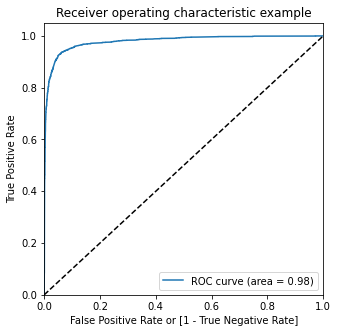

In [121]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

🔹 We are getting good ROC curve value i.e. 0.98 indicating a good model.

## Finding a optimal cut off point

▪ Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [122]:
# Lets create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.051613,302,0,1,0,0,0,0,0,0,0,0,0
1,0,0.007641,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.530152,1033,1,1,1,1,1,1,1,0,0,0,0
3,0,0.014978,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.996739,3241,1,1,1,1,1,1,1,1,1,1,1


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.891246  0.969934  0.842694
0.2   0.2  0.920163  0.955107  0.898602
0.3   0.3  0.932893  0.941104  0.927827
0.4   0.4  0.939494  0.927100  0.947141
0.5   0.5  0.938080  0.906919  0.957306
0.6   0.6  0.932265  0.873970  0.968234
0.7   0.7  0.926921  0.846787  0.976366
0.8   0.8  0.920635  0.818781  0.983482
0.9   0.9  0.900204  0.755354  0.989581


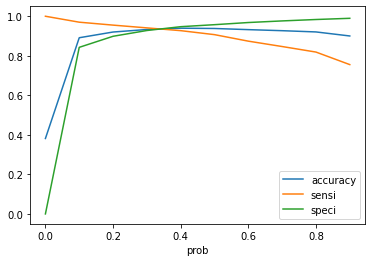

In [124]:
# Lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

▪ From the plot above we can see that optimal cutoff point will be 0.30

In [125]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.051613,302,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.007641,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.530152,1033,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.014978,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.996739,3241,1,1,1,1,1,1,1,1,1,1,1,1


In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.9328932893289329

In [127]:
#Now we will create confussion matrix again for the new cut-off.
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted)
confusion2

array([[3651,  284],
       [ 143, 2285]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
#checking specificity of our model
TN / float(TN+FP)

0.9278271918678526

In [130]:
#checking sensitivity of our model
TP / float(TP+FN)

0.9411037891268533

In [131]:
#checking false poitive rate of our model
print(FP/ float(TN+FP))

0.0721728081321474


In [132]:
#positive predictive value
print (TP / float(TP+FP))

0.8894511483067341


In [133]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9623089088033737


## Precision and Recall Score

In [134]:
#Precison Score
precision_score(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted)

0.8894511483067341

In [135]:
#Recall Score
recall_score(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted)

0.9411037891268533

## Precision and Recall tradeoff

In [136]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

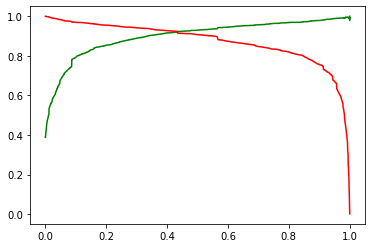

In [137]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Predicting in test sets

In [138]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,...,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
6906,0,4.0,1530,2.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1873,0,2.0,186,2.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
771,0,7.0,49,7.0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4495,0,4.0,144,4.0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
9061,0,2.0,1788,2.0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [139]:
##Scaling numeric column for test dataset
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [140]:
X_test = X_test[cols]

In [141]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Occupation_not specified,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Modified
6906,0,1.919395,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1873,0,-0.546142,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
771,0,-0.797465,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4495,0,-0.623190,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9061,0,2.392690,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


#### Since now scaling is done we can add constant and predict using our model.

In [142]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [143]:
#Prediction
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

6906    0.998868
1873    0.024663
771     0.003229
4495    0.003867
9061    0.990961
4929    0.204856
2308    0.016486
1034    0.030607
9033    0.003205
7008    0.987432
dtype: float64

In [144]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [145]:
y_pred_1.head()

,0
6906,0.998868
1873,0.024663
771,0.003229
4495,0.003867
9061,0.990961


In [146]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [147]:
y_test_df.head()

,Converted
6906,1
1873,0
771,0
4495,0
9061,1


In [148]:
#Using Prospect ID as index
y_test_df['Prospect ID'] = y_test_df.index

In [149]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [150]:
#Concatinating both the data frames
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)

In [151]:
#Viewing new datafrmae
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.998868
1,0,1873,0.024663
2,0,771,0.003229
3,0,4495,0.003867
4,1,9061,0.990961


In [152]:
#renaming the column name
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [153]:
#Using optimal cutoff point in our test dataset
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [154]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,Final_Predicted
0,1,6906,0.998868,1
1,0,1873,0.024663,0
2,0,771,0.003229,0
3,0,4495,0.003867,0
4,1,9061,0.990961,1


In [155]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.9365603226989365

## Metrics Beyond Accuracy for test set

In [156]:
#Creating confussiion matrix for test data set
confusion3 = metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.Final_Predicted)
confusion3

array([[1558,  102],
       [  71,  996]], dtype=int64)

In [157]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9334582942830365

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.9385542168674699

In [160]:
#checking false poitive rate of our model
print(FP/ float(TN+FP))

0.06144578313253012


In [161]:
#positive predictive value
print (TP / float(TP+FP))

0.907103825136612


In [162]:
# Negative predictive value
print(TN / float(TN+ FN))

0.956414978514426


### Assigning the lead score to test data and drawing out the hot leads 

In [163]:
y_pred_final['lead score'] = y_pred_final.Converted_Prob.map(lambda x : round(x*100))

In [164]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,Final_Predicted,lead score
0,1,6906,0.998868,1,100
1,0,1873,0.024663,0,2
2,0,771,0.003229,0,0
3,0,4495,0.003867,0,0
4,1,9061,0.990961,1,99


In [165]:
###customers with lead score of more than or equal to 85 can be termed as hot leads
Hot_leads = y_pred_final.loc[y_pred_final['lead score']>=85]

In [166]:
Hot_leads.head()

,Converted,Prospect ID,Converted_Prob,Final_Predicted,lead score
0,1,6906,0.998868,1,100
4,1,9061,0.990961,1,99
9,1,7008,0.987432,1,99
11,1,3074,0.995583,1,100
13,1,6163,0.974306,1,97


In [167]:
Hot_leads.shape

(863, 5)

* There are 863 hot leads whose chances of conversion is high.

In [168]:
Hot_leads_ID = Hot_leads['Prospect ID'].values 

In [169]:
#Prospect ID of hot leads that need to be contacted are in Hot_leads_ID variable.

Hot_leads_ID[:100]  # first 100 Hot_leads_ID observations

array([6906, 9061, 7008, 3074, 6163, 6482,  962, 2241, 1860, 1167, 4872,
       4407, 2380, 3615, 1710, 1200,  662, 2198, 7963,  223,  449,  746,
       4250, 7911, 6243,  353, 4812, 3028, 7263, 2952,  676, 4049, 7098,
       5752, 8107, 8989, 8664, 4849,  675, 2050, 8118, 9210, 3952, 9203,
       2095, 2709, 4748, 4291, 4879, 3535, 1581, 3437, 4892, 8452, 5687,
       6912, 7316, 5617, 6484, 4523,  331, 4803, 2940, 3543, 8960, 7452,
       8673, 5354, 2161, 5540,   76, 4480, 1731, 6299, 2338, 3496, 4607,
       5591, 8556, 7033, 6819, 3350, 7102, 3822, 2655, 4779, 7733, 7652,
       6438, 3465, 8588, 5343, 4131, 6240, 3977, 2001, 2734, 1289, 2126,
        784], dtype=int64)

## Observations:-


#### Following are the accuracy metrics concluded from train datset :-

* Accuracy    : 93.28 %

* Specificity : 92.78 %

* Sensitivity : 94.11 %

#### Following are the accuracy metrics concluded from test dataset:-

* Accuracy    : 93.65 % 
* Specificity : 93.85 %
* Sensitivity : 93.34 %

#### Top three Variables contributed Most to our Model are :
* Tags_lost to EINS
* Tags_Closed by Horizzon
* Lead_Source_Welingak Website